**PROJECT DESCRIPTION:**

AssurePredict is a leading insurance company specializing in innovative risk management solutions. This project aims to create a predictive model capable of identifying potential cross-selling opportunities for existing customers, identifying those who may be interested in purchasing an additional policy for their vehicle.
The goal is to develop a machine learning model that predicts whether customers who currently have health insurance might be interested in purchasing insurance for their vehicle. The model will help AssurePredict improve the effectiveness of its cross-selling strategies and increase market penetration.

In [ ]:
# EXPLORING THE DATASET (EDA)
# Importing package
from google.colab import files

# Allow the user to upload the file directly from their computer
uploaded = files.upload()

# Load the dataset from the uploaded file
import pandas as pd
df = pd.read_csv('insurance_cross_sell.csv')

# Display the first few rows of the dataset
df.head()

Saving insurance_cross_sell.csv to insurance_cross_sell.csv


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


The main features of the dataset are:
- id: unique identifier of the customer (Discrete);
- Gender: gender of the customer (Categorical - Nominal);
- Age: age of the customer (Continuous);
- Driving_License: 1 if the customer holds a driving license, 0 otherwise (Binary - Discrete);
- Region_Code: unique code of the customer's region of residence (Categorical - Nominal);
- Previously_Insured: 1 if the customer has an insured vehicle, 0 otherwise (Binary - Discrete);
- Vehicle_Age: age of the customer's vehicle (Categorical - Ordinal; " < 1 Year", "1-2 Year", "> 2 Years");
- Vehicle_Damage: 1 if the customer has had accidents or damages to the vehicle in the past, 0 otherwise (Binary - Discrete);
- Annual_Premium: annual insurance premium amount paid by the customer  (Continuous);
- PolicySalesChannel: channel used for selling the policy (e.g., email, phone, in-person) (Categorical - Nominal);
- Vintage: number of days the customer has been insured with AssurePredict (Discrete);
- Response: 1 if the customer accepted the cross-sell proposal, 0 otherwise
 (Binary - Discrete).

In [ ]:
# NA count
df.isna().sum() # in order to check if it's necessary some kind of data imputation

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


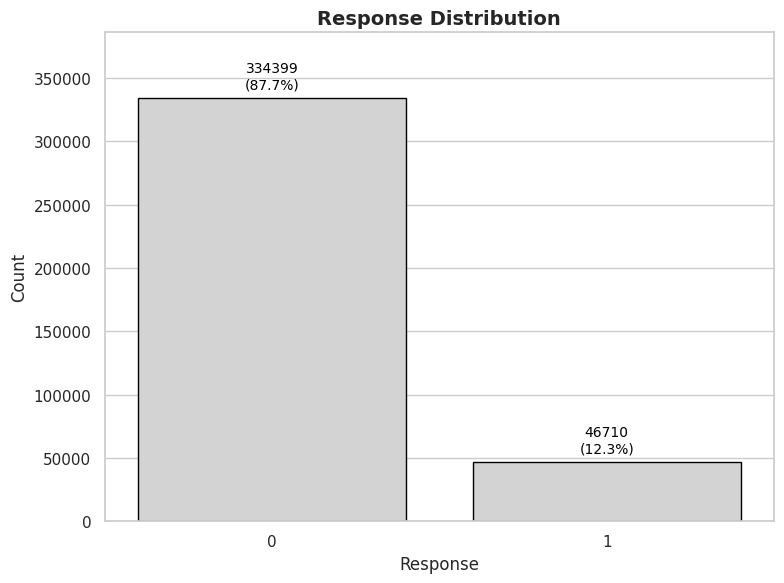

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of the 'Response' variable (percentages)
response_distribution = df['Response'].value_counts(normalize=True) * 100

# Plotting the bar plot
plt.figure(figsize=(8, 6))

# Create the count plot
sns.set(style="whitegrid")  # Set the style to whitegrid for better readability
ax = sns.countplot(x='Response', data=df, color='lightgray', edgecolor='black')

# Add both counts and percentages above the bars
for p in ax.patches:
    height = p.get_height()
    count = int(height)
    percentage = height / df.shape[0] * 100

    # Annotate both count and percentage above the bars
    ax.annotate(f'{count}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Response Distribution', fontsize=14, weight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Increase y-axis limit (e.g., set y-axis limit to 0 to max count + a little more space)
plt.ylim(0, ax.get_ylim()[1] * 1.1)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen from this bar plot that there are far fewer customers who did not accept the cross-sell proposal (about 87.7%) than those who did (about 12.3%). We have, therefore, a situation of strong imbalance between these two categories of customers.


Descriptive statistics for Annual_Premium grouped by Response:
             count          mean           std     min      25%      50%  \
Response                                                                   
0         334399.0  30419.160276  16998.293197  2630.0  24351.0  31504.0   
1          46710.0  31604.092742  18646.508040  2630.0  24868.0  33002.0   

              75%       max  
Response                     
0         39120.0  540165.0  
1         41297.0  540165.0  


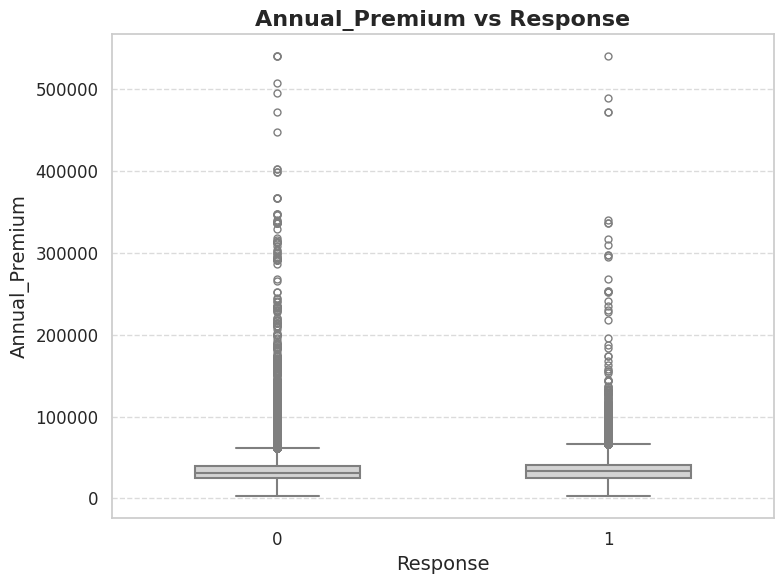


Descriptive statistics for Age grouped by Response:
             count       mean        std   min   25%   50%   75%   max
Response                                                              
0         334399.0  38.178227  15.816052  20.0  24.0  34.0  49.0  85.0
1          46710.0  43.435560  12.168924  20.0  35.0  43.0  51.0  83.0


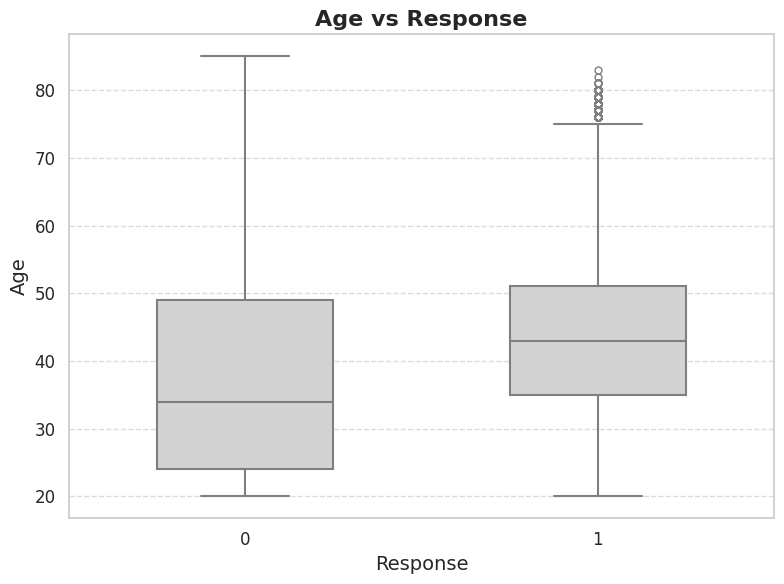


Descriptive statistics for Vintage grouped by Response:
             count        mean        std   min   25%    50%    75%    max
Response                                                                  
0         334399.0  154.380243  83.661975  10.0  82.0  154.0  227.0  299.0
1          46710.0  154.112246  83.738574  10.0  82.0  154.0  226.0  299.0


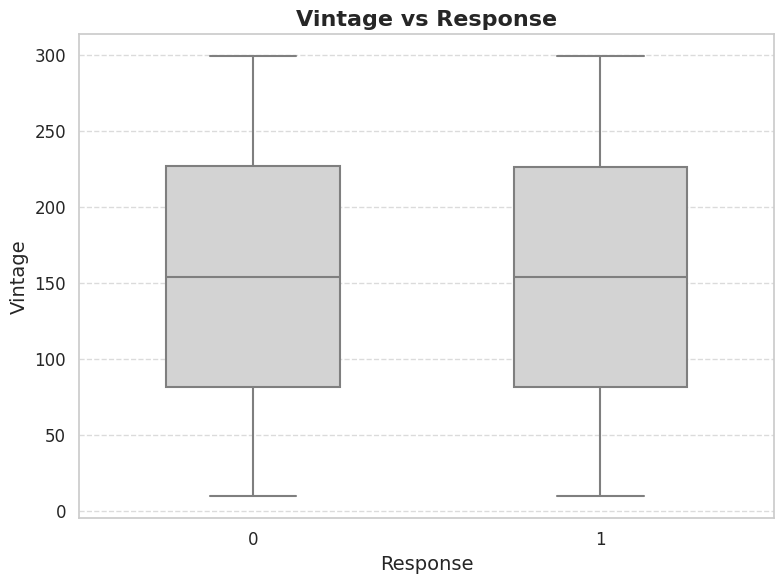

In [ ]:
# Define the columns to iterate over
columns_to_plot = ['Annual_Premium', 'Age', 'Vintage']

# Iterate over the columns and create a boxplot for each one
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))

    # Create a boxplot with enhanced visual elements
    ax = sns.boxplot(x='Response', y=column, data=df, color='lightgray', width=0.5, fliersize=5, linewidth=1.5)

    # Customize the plot
    ax.set_title(f'{column} vs Response', fontsize=16, weight='bold')
    ax.set_xlabel('Response', fontsize=14)
    ax.set_ylabel(column, fontsize=14)

    # Improve the tick label size and rotation for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot with gridlines for better reading of values
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Display descriptive statistics for the column grouped by 'Response'
    response_stats = df.groupby('Response')[column].describe()
    print(f'\nDescriptive statistics for {column} grouped by Response:')
    print(response_stats)

    # Show the plot
    plt.tight_layout()
    plt.show()

Here we have several boxplots and descriptive statistics, comparing different quantitative features of the dataset and the target variable of our interest “Response” (1 if the customer accepted the cross-sell proposal, 0 otherwise):
- the annual amount of the insurance premium paid by the customer (“Annual_Premium”) turns out to be almost identical for the two “Response” modes;
- regarding the age of the customer (“Age”) conditioned on the two “Response” modes, it can be seen that those who did not accept the cross-sell proposal have a wider range of variation than those who accepted the proposal;
- on the other hand, regarding the feature representing the days since the customer has been insured with AssurePredict (“Vintage”) conditioned, again, for the two modes of “Response,” no difference can be seen.

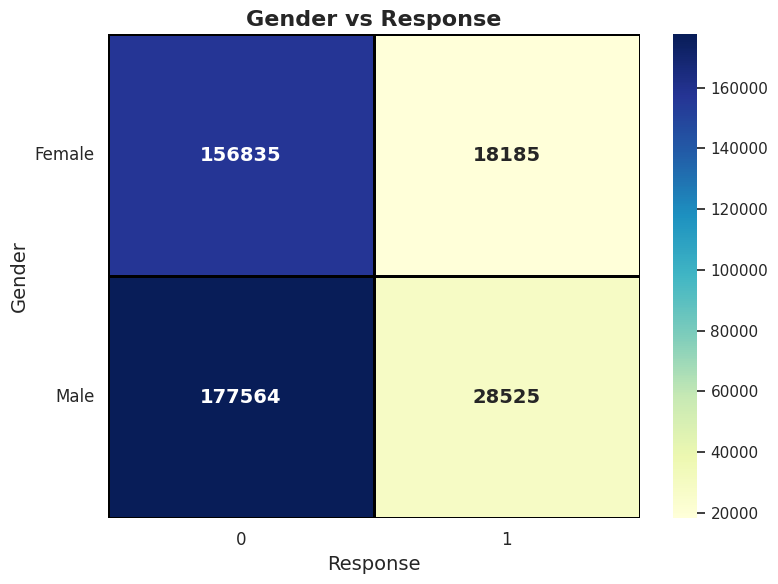

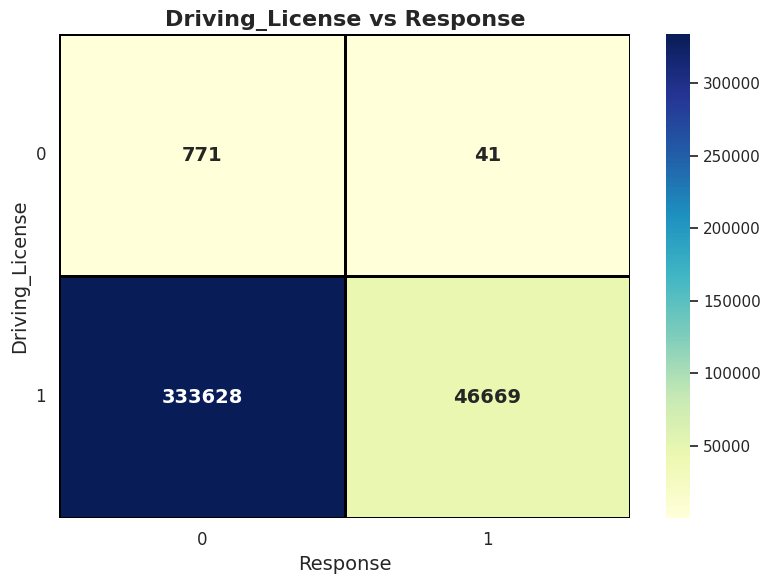

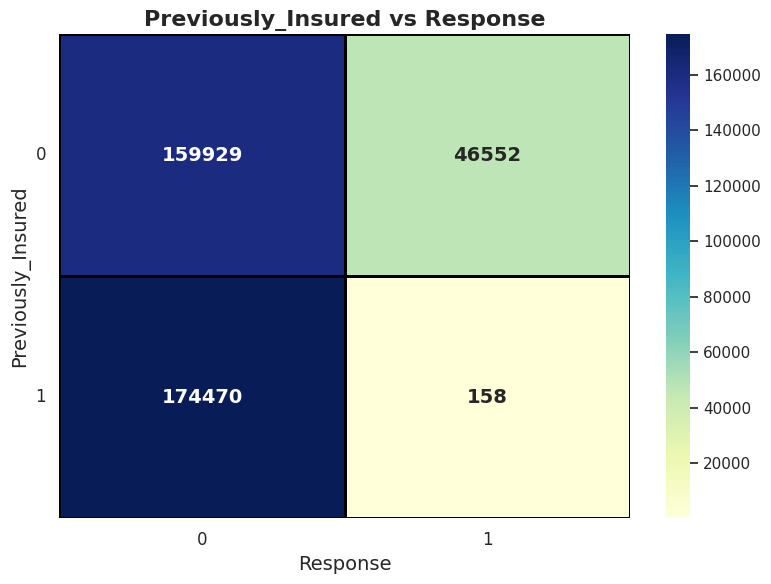

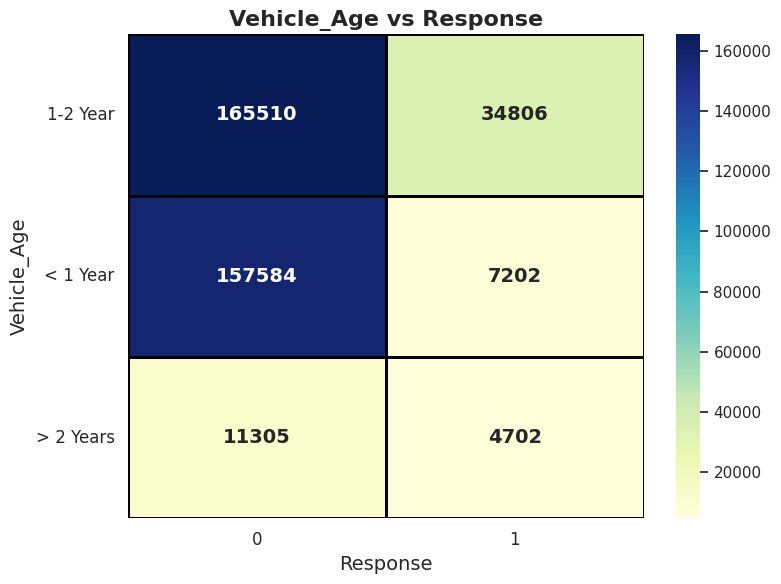

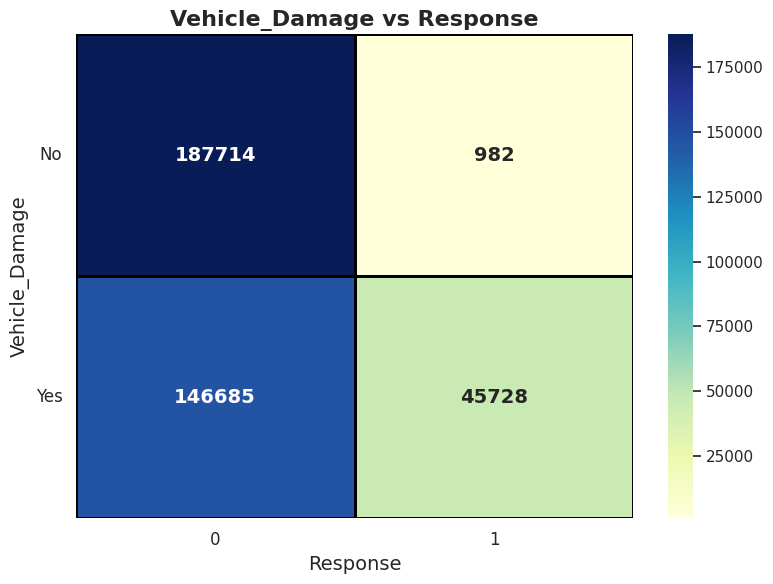

In [ ]:
# List of variables to visualize
variables = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

# Loop through each variable and create a contingency table and heatmap
for var in variables:
    # Create a contingency table (cross-tab) for each variable vs Response
    contingency_table = pd.crosstab(df[var], df['Response'])

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
                annot_kws={'size': 14, 'weight': 'bold'}, linewidths=1, linecolor='black')

    # Customize the plot
    plt.title(f'{var} vs Response', fontsize=16, weight='bold')
    plt.xlabel('Response', fontsize=14)
    plt.ylabel(var, fontsize=14)

    # Improve the tick label size and rotation for better readability
    plt.xticks(fontsize=12, rotation=0)  # No rotation for clarity
    plt.yticks(fontsize=12, rotation=0)

    # Show the plot with tight layout for better space distribution
    plt.tight_layout()

    # Show the plot
    plt.show()

Here, however, we have different heatmaps, comparing different qualitative
features of the dataset and the target variable “Response”:

- Gender vs Response -> obviously, we will have many more men and women who did not accept the cross-sell proposal (0 turns out to be the majority class of “Response”);
- Driving_License vs Response -> we have more people who hold a driver's license who did not accept the proposal. Logically, those who do not have a driver's license will not have the same interest as those who do have a license;
- Previously_Insured vs Response -> both those who own a previously insured vehicle and those who do not, did not accept the cross-sell proposal, fairly evenly;
- Vehicle_Age vs Response -> those who own vehicles having less than one year of age (<1 Year) and having between one and two years of age (1-2 Year) are those who most did not accept the cross-sell proposal;
- Vehicle_Damage vs Response -> those who have had no accidents or vehicle damage in the past are the same as those who did not accept the cross-sell proposal, followed by those who have had accidents instead, again in the context of Response class 0 (majority class).

In [ ]:
# Importing package
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for 'Vehicle_Age' (ordinal variable)
# 'Vehicle_Age' contains ordinal categories, so we can use Label Encoding.
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])

# Label encoding for 'Vehicle_Damage' (binary variable)
# 'Vehicle_Damage' has only two categories: "Yes" and "No", so we can use Label Encoding.
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

# Label encoding for 'Gender' (binary variable)
# 'Gender' is a binary variable with two categories: Male and Female.
# Therefore, Label Encoding can be applied.
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Deleting the "id", "Region_Code", "Policy_Sales_Channel" columns (useless for model training purposes)
# These do not contribute to the model training and should be removed.
df = df.drop(["id", "Region_Code", "Policy_Sales_Channel"], axis=1)

# Show results
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,44,1,0,2,1,40454.0,217,1
1,1,76,1,0,0,0,33536.0,183,0
2,1,47,1,0,2,1,38294.0,27,1
3,1,21,1,1,1,0,28619.0,203,0
4,0,29,1,1,1,0,27496.0,39,0


Description of the codes for 'Vehicle_Age':
- "< 1 Year" --> 0;
- "1-2 Year" --> 1;
- "> 2 Years" --> 2.

The numeric codes indicate the vehicle's age in increasing order. Higher values indicate older vehicles. The higher the value, the older the vehicle.

Description of the codes for 'Vehicle_Damage':
- "No" --> 0;
- "Yes" --> 1.

0 indicates that the vehicle does not have damage, while 1 indicates that the vehicle has damage.

Description of the codes for 'Gender':
- "Female" --> 0;
- "Male" --> 1.

0 represents the female gender, and 1 represents the male gender.

In [ ]:
# MANAGEMENT OF CLASS IMBALANCE
# Importing package
from sklearn.model_selection import train_test_split

# Set the RANDOM_SEED for reproducibility
RANDOM_SEED = 0

# Remove the 'Response' column from the DataFrame and use the remaining columns for X (features)
x = df.drop('Response', axis=1).values

# Extract the values of the 'Response' column as the target variable y
y = df["Response"].values

# Split the dataset into training and testing sets (30% test size), using stratified sampling to preserve class distribution
# 'random_state' ensures reproducibility; 'stratify=y' handles class imbalance in the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [ ]:
# Number of examples * number of features in the training set
x_train.shape

(266776, 8)

In [ ]:
# Number of examples * number of features in the test set
x_test.shape

(114333, 8)

In [ ]:
# Importing package
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
ss = StandardScaler()

# Fit and transform the training data (x_train) to standardize it
# This scales the features by removing the mean and scaling to unit variance
x_train = ss.fit_transform(x_train)

# Transform the test data (x_test) using the same scaler, but do not fit again
# This ensures that the scaling applied to the test data is based on the training data
x_test = ss.transform(x_test)

In [ ]:
# CONSTRUCTION OF THE PREDICTIVE MODEL
# Importing packages
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

# Create an oversampling sampler to balance the dataset
oversampler = RandomOverSampler(random_state=RANDOM_SEED)

# Create the logistic regression model with 'class_weight' set to 'balanced'
# 'class_weight="balanced"' adjusts the model to give more importance to the minority class
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED)

# Create the pipeline that includes the oversampling step and the logistic regression model
# The pipeline first applies oversampling, then trains the logistic regression model
pipeline = Pipeline([
    ('oversampler', oversampler),  # Step 1: Apply oversampling to balance the dataset
    ('logistic', model)  # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=0)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0))])

##**1. Oversampling (RandomOverSampler)**:

Oversampling is a technique used to address the imbalanced class problem, where one class (for example, the minority class) has significantly fewer samples compared to the other class. In a binary classification context, this issue arises when one class has many more examples than the other.

RandomOverSampler is an oversampling method that works by randomly duplicating samples from the minority class (or creating new synthetic samples in other methods like SMOTE) until the dataset is balanced.

###**What does oversampling do?**

Increases the minority class: It applies an algorithm that randomly duplicates instances of the minority class. In other words, the observations of the underrepresented class are repeated to balance the number of samples across both classes.

Example: If your dataset has 10,000 samples from class 0 and only 2,000 samples from class 1, oversampling might duplicate (or synthetically create) samples of class 1 until both classes have the same number of samples, for instance, 10,000 samples each.

###**Advantages of oversampling:**

Helps to reduce model bias towards the majority class (especially if the dataset is highly imbalanced).

Allows the model to better learn the distribution of the minority class by increasing the number of examples available for training.

###**Disadvantages of oversampling:**

Overfitting: Duplicating samples might lead to overfitting, where the model may learn to recognize just those repeated instances, which may not reflect the true variability of the data.

Lack of diversity in the data: Duplicating instances doesn't add new information, just more of the same, potentially reducing the ability to generalize.


##**2. class_weight='balanced'**:

The class_weight='balanced' parameter is a strategy for addressing class imbalance during model training. When set, it automatically adjusts the importance (weight) given to each class based on its frequency.

###**What does class_weight='balanced' do?**

It computes the inverse frequency of each class to ensure the model places more importance on the minority class. It essentially means the model will be penalized more for misclassifying minority class examples, making it more sensitive to those errors.

Example: If there are only 2,000 samples in the minority class and 10,000 samples in the majority class, class_weight='balanced' will assign a higher weight to the minority class so the model pays more attention to correctly predicting that class.

###**What it allows:**

Automatically adjusts the importance of each class, without requiring any changes to the dataset.

The result is that the model is penalized more for errors on the minority class, thus guiding the model to be more sensitive to that class during training.

###**Advantages of class_weight='balanced':**
No dataset modification needed: Unlike oversampling, there's no need to modify the dataset. The model adjusts its learning strategy internally.

Particularly useful when you don’t want to alter the structure of your dataset but still want the model to pay more attention to the minority class.

###**Disadvantages of class_weight='balanced':**

It might not be enough to solve overfitting for the majority class, as it doesn’t change the number of samples.

It doesn't solve the problem of scarcity of examples for the minority class, it just makes the model pay more attention to them.

##**Combining Oversampling and class_weight='balanced'**:

By combining oversampling and class_weight='balanced', you are trying to get the best of both worlds:

- Oversampling increases the number of samples from the minority class, so the model has more data to learn from;

- class_weight='balanced' ensures that the model gives more importance to the minority class when learning, by adjusting the weights during training.

This combination helps to address the class imbalance problem by ensuring that the model is both exposed to more examples of the minority class and also pays more attention to those examples during training.

###**Practical Example:**
Let’s assume that your dataset consists of 95,000 customers who did not accept a cross-sell offer (class 0), and 5,000 customers who did accept the offer (class 1).

Oversampling would duplicate the minority class samples, creating 95,000 instances of class 1.

class_weight='balanced' would make the model pay more attention to class 1 by increasing the importance of correctly predicting those 5,000 samples, making it less biased towards class 0.

Oversampling and class_weight='balanced' are complementary methods used to address imbalanced datasets.

Oversampling increases the representation of the minority class in the dataset, while class_weight='balanced' makes the model more sensitive to the errors made on the minority class during training.

Combining these techniques increases the likelihood that the model will correctly identify the minority class while not neglecting the majority class.

In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
# This returns an array with the probabilities of each class for every sample
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
# This returns an array with the probabilities of each class for every sample in the test set
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# Import package
import numpy as np

# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

Use a custom threshold (e.g., 0.4) to decide the predicted labels (1 or 0) based on the probability for the positive class.

We choose a lower threshold (0.4) because the goal is to favor the detection of the minority class (customers accepting the offer).

A lower threshold helps minimize false negatives (missed opportunities where customers who would accept the offer are classified as rejections).

By lowering the threshold, we are more likely to classify potential customers who might accept the offer, even if their probability is not as high.

This strategy is especially useful in situations where the cost of missing an opportunity (false negative) is higher than contacting a customer who
might not accept the offer (false positive).

In [ ]:
# Import packages
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score

# Define a function called 'classif_report' that accepts two arguments:
# - y_true: the true labels (actual values) of the data.
# - y_pred: the predicted labels (values predicted by the model).
def classif_report(y_true, y_pred):

    # Calculate and print the precision score.
    # Precision measures the percentage of correct predictions among all the predictions made as positive.
    precision = precision_score(y_true, y_pred)
    print(f"PRECISION: {round(precision, 2)}")

    # Calculate and print the recall score.
    # Recall measures the percentage of true positives correctly identified among all the actual positives.
    recall = recall_score(y_true, y_pred)
    print(f"RECALL: {round(recall, 2)}")

    # Calculate and print the F1 score.
    # The F1 score is the harmonic mean between precision and recall, and it is a good indicator of the model's overall performance.
    f1 = f1_score(y_true, y_pred)
    print(f"F1: {round(f1, 2)}")

    # Calculate and print the accuracy of the model.
    # Accuracy measures the percentage of correct predictions (both positive and negative) out of all predictions.
    accuracy = accuracy_score(y_true, y_pred)
    print(f"ACCURACY: {round(accuracy, 2)}")

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
# In this case, 'y_train' represents the true labels (actual values), while 'y_pred_train' represents
# the predicted values from the model for the training set.
classif_report(y_train, y_pred_train)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


##**1. Precision: 0.25**
###**What it represents:**

Precision measures the proportion of true positive predictions among all instances that were predicted as positive. In other words, it answers the question: "Of all the instances predicted as positive, how many were actually positive?"

###**In this case:**

A precision of 0.25 means that when the model predicts a customer will accept the cross-sell offer (i.e., class "1"), only 25% of those predictions are correct (actually, they do accept the offer), and 75% of the predicted positives are incorrect (false positives). This is typically considered a low precision, especially when dealing with imbalanced classes, as it suggests a relatively high number of false positives.

###**Which class:**

The precision value refers to class "1" (the minority class: customers who accepted the offer). A precision of 0.25 means that a significant portion of the customers predicted as "accepting the offer" did not actually accept it.

##**2. Recall: 0.98**
###**What it represents:**

Recall (also called sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positives. It answers the question: "Of all the actual positives (customers who truly accepted the offer), how many did the model correctly identify?"

###**In this case:**

A recall of 0.98 means that the model correctly identified 98% of the customers who actually accepted the cross-sell offer (class "1"). This is considered a high recall, meaning the model is very good at detecting most of the customers who accepted the offer, minimizing the false negatives (those who accepted the offer but were predicted as not accepting).

##**Which class:**

The recall value refers to class "1" (the minority class). A recall of 0.98 means that the model is very successful at identifying the positive class (accepted the offer).

##**3. F1 Score: 0.4**
###**What it represents:**

The F1 score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric to give a balanced view of model performance, especially when you have imbalanced classes. The F1 score is particularly useful when you want to strike a balance between precision and recall.

###**In this case:**

An F1 score of 0.4 means there is a significant trade-off between precision and recall. While the recall is high (0.98), the precision is low (0.25), which causes the F1 score to be lower. The model is good at identifying the positives, but many of those predictions are false positives, resulting in a lower F1 score. This is considered suboptimal performance, as it suggests that the model is not achieving a good balance between precision and recall.

###**Which class:**

The F1 score combines both precision and recall for class "1" (accepted the offer). The lower F1 score suggests that, although the recall is high, precision is too low to achieve a good overall balance.

##**4. Accuracy: 0.64**
###**What it represents:**

Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions. It answers the question: "How often is the model correct overall?"

###**In this case:**

An accuracy of 0.64 means that the model correctly predicted 64% of the instances (both positive and negative cases). While this might seem like a decent number, accuracy is not a good metric when dealing with imbalanced datasets because it doesn't distinguish between the performance on the minority and majority classes. For example, if the model predicts the majority class most of the time (class "0" — customers who didn't accept the offer), the accuracy can still be relatively high, even though the model might be performing poorly on the minority class.

###**Which class:**

Accuracy refers to both classes, but it’s especially misleading in imbalanced datasets because it may reflect good performance on the majority class without actually being effective for the minority class (the class of interest here, "1").

##**What do these results mean for this model?**
**Precision (0.25)**: The model is not good at predicting positive instances (customers who accepted the offer). It has a high false positive rate, which means many customers are predicted to accept the offer when they do not.

**Recall (0.98)**: The model is very good at identifying customers who actually accepted the offer. It has few false negatives, meaning it misses very few of the true positive cases.

**F1 (0.4)**: The F1 score is low due to the low precision. Even though the model is great at recalling the positives, it incorrectly labels many negatives as positives, which lowers the harmonic mean of precision and recall.

**Accuracy (0.64)**: The accuracy metric suggests that overall, the model is correct 64% of the time, but this might be misleading given the class imbalance. The model could be biased towards predicting the majority class (class "0").

##**Are these values good?**
Recall is very high, which is great in situations where detecting positive cases (e.g., cross-sell acceptance) is more important than precision (e.g., contacting a customer who didn't accept the offer).

Precision is low, which means the model makes a lot of false positive predictions, which could lead to wasting resources by contacting customers who don't actually accept the offer.

The F1 score reflects this trade-off and is considered suboptimal in this case because it shows that the balance between precision and recall could be improved.

The accuracy is misleading in the context of class imbalance because the model might be performing well on the majority class (class "0").

In [ ]:
# same for the test set.
classif_report(y_test, y_pred_test)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


We have similar results in the test set as in the training set.




In [ ]:
# Here, we used "classification report" directly from scikit-learn (train set).
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234158
           1       0.25      0.98      0.40     32618

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776



In [ ]:
# same for the test set.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100241
           1       0.25      0.98      0.40     14092

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



Here, we can see the performance metrics for both classes (train set and test set).

In [ ]:
# Function to plot the confusion matrix
# y_true: the true labels
# y_pred: the predicted labels from the model
# labels: a list containing the names of the classes (default is "Negative" and "Positive")
# show_precision_recall: if set to True, it also shows precision and recall metrics on the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=False):

    # Calculate the confusion matrix (true negative, false positive, false negative, true positive)
    cm = confusion_matrix(y_true, y_pred)  # tn, fp, fn, tp

    # Create a DataFrame for the confusion matrix, with labels for the rows and columns
    df_cm = pd.DataFrame(cm, index=labels,
                         columns=["Predicted "+labels[0], "Predicted "+ labels[1]])

    # Plot the confusion matrix as a heatmap using seaborn
    sns.heatmap(df_cm, annot=True, fmt="g")

    # If 'show_precision_recall' is True, calculate and display precision and recall on the confusion matrix
    if show_precision_recall:
        # Calculate and display precision (for the positive class)
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        plt.text(0, -0.1, f"Precision: {precision:.2f}")  # Place the precision value on the heatmap

        # Calculate and display recall (for the positive class)
        recall = cm[1][1] / (cm[1][1] + cm[1][0])
        plt.text(1, -0.1, f"Recall: {recall:.2f}")  # Place the recall value on the heatmap

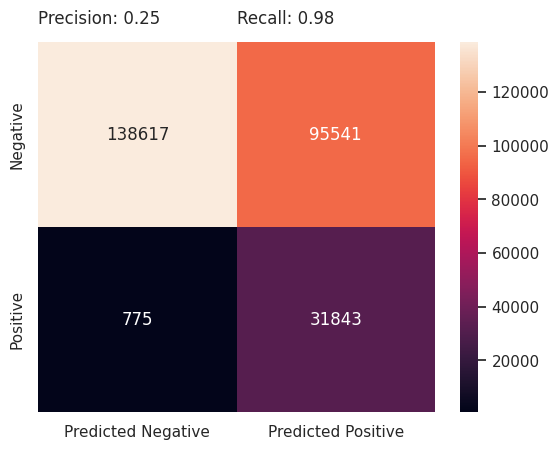

In [ ]:
# Plot the confusion matrix for the training set, with the true labels y_train
# and the predicted labels y_pred_train.
# Set 'show_precision_recall=True' to also display the precision and recall metrics
# on the confusion matrix.
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

##**What is a Confusion Matrix?**

A confusion matrix is a performance measurement tool for classification models. It is a table used to evaluate the accuracy of a classification algorithm by comparing the actual (true) values to the predicted values made by the model. This matrix helps to visualize the performance of the algorithm in a more detailed manner.

The confusion matrix is typically used for binary classification (i.e., when there are two classes), but it can be extended to multi-class classification as well.

##**Breakdown of Elements:**
- True Negative (TN): The number of times the model correctly predicted the negative class (i.e., the model predicted negative when the true class was also negative);

- False Positive (FP): The number of times the model incorrectly predicted the positive class (i.e., the model predicted positive when the true class was negative). This is also known as a "Type I error";

- False Negative (FN): The number of times the model incorrectly predicted the negative class (i.e., the model predicted negative when the true class was positive). This is also known as a "Type II error";

- True Positive (TP): The number of times the model correctly predicted the positive class (i.e., the model predicted positive when the true class was also positive).

##**How to Read the Matrix?**
In our case:

- True Negative (TN) = 138617: 138617 times the model predicted Negative, and the true class was indeed Negative.

- False Positive (FP) = 955441: 955441 times the model predicted Positive, but the true class was Negative.

- False Negative (FN) = 775: 775 times the model predicted Negative, but the true class was Positive.

- True Positive (TP) = 31843: 31843 times the model predicted Positive, and the true class was indeed Positive.

##**Why Use a Confusion Matrix?**
- Balanced Evaluation:
  It allows you to evaluate your model beyond simple accuracy, which can be misleading in imbalanced datasets. For example, if the dataset has a very high number of negative samples (class imbalance), accuracy might be high simply because the model is predicting the majority class (negative) most of the time. However, precision, recall, and F1 score provide better insights into how well the model handles both classes;

- Performance Insights: The confusion matrix helps to directly see where the model is making errors (e.g., more false positives or false negatives), which allows you to focus on improving the model in specific areas.

##**Visualizing the Confusion Matrix with Precision and Recall**
In the function plot_confusion_matrix(y_true, y_pred, show_precision_recall=True), if show_precision_recall=True is passed, the function calculates the precision and recall values and places them on the confusion matrix visualization. This will help you understand at a glance how well your model is identifying both the positive and negative classes, along with these key metrics.

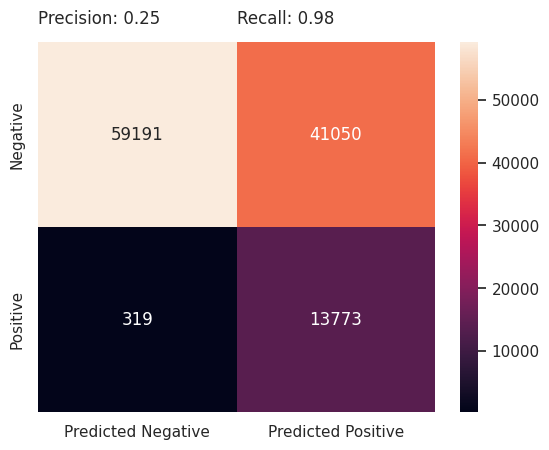

In [ ]:
# same for test set.
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Here, what we said previously for the confusion matrix (train set) also applies
here for the test set.

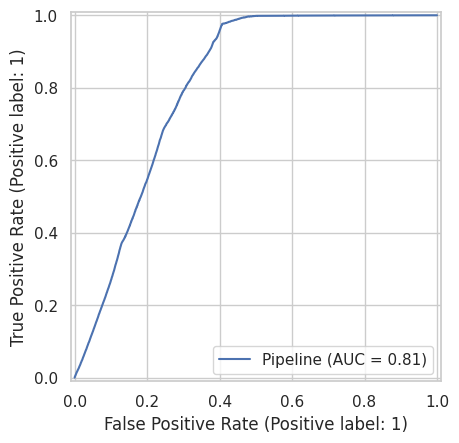

In [ ]:
# Plot the ROC (Receiver Operating Characteristic) curve for the logistic regression model (lr)
# using the training set (x_train and y_train)
RocCurveDisplay.from_estimator(pipeline, x_train, y_train)

##**1. ROC Curve (Receiver Operating Characteristic Curve):**
The ROC curve is a graphical representation used to evaluate the performance of a classification model, particularly when the classes are imbalanced. It is primarily used in binary classification tasks (i.e., two classes: Positive and Negative). The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds:

- True Positive Rate (TPR), also called Recall or Sensitivity, is the proportion of actual positives that are correctly identified as positive by the model;

- False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly identified as positive by the model.

The ROC curve is a plot where:

- The x-axis represents the False Positive Rate (FPR);

- The y-axis represents the True Positive Rate (TPR).

Each point on the ROC curve corresponds to a different threshold value used for classification. By adjusting the threshold, you get different values of TPR and FPR, and these are plotted on the curve.

###**Key Features of the ROC Curve:**
- Diagonal Line (Random Classifier): The diagonal line (also called the line of no discrimination) represents the performance of a random classifier. A random classifier would have a 50% chance of correctly classifying a positive or negative instance, so the ROC curve would lie along this line. In practice, you want your model to perform better than this.

The higher the ROC curve, the better your model is at distinguishing between the positive and negative classes.

- Threshold Adjustment: As you move along the ROC curve, you're changing the decision threshold for classifying instances as positive or negative. Lowering the threshold increases the number of predicted positives, which tends to increase TPR but also increases FPR.

###**Interpreting the ROC Curve:**
- Closer to the top-left corner: A good model’s ROC curve should curve upwards towards the top-left corner of the plot. This indicates a high true positive rate and a low false positive rate, meaning the model is doing well at identifying positive instances and not misclassifying many negative ones;

- Closer to the diagonal line: If the ROC curve is closer to the diagonal, it indicates a model that is not doing much better than random guessing;

- Steep curve: A sharp rise to the top-left corner indicates that the model quickly starts identifying positives correctly without many false positives, which is ideal.

##**2. AUC (Area Under the Curve):**
AUC stands for Area Under the ROC Curve. It quantifies the overall performance of the model. AUC is a scalar value that tells us how well the model distinguishes between the classes.

AUC ranges from 0 to 1:

- AUC = 1: Perfect model. It perfectly separates positive and negative classes with no errors;

- AUC = 0.5: Random model. The model is no better than random guessing;

- AUC < 0.5: The model is performing worse than random guessing. This usually happens when the model is predicting the wrong class for almost all instances.

The AUC value gives you a measure of how much the model is capable of distinguishing between classes:

- AUC = 0.8-0.9: Good model;

- AUC = 0.7-0.8: Fair model;

- AUC = 0.6-0.7: Poor model;

- AUC < 0.6: Model has poor performance.

###**How to Interpret AUC:**
- High AUC (close to 1): A high AUC value indicates that the model has a strong ability to differentiate between the positive and negative classes. The higher the AUC, the better the model's predictive ability.

- Low AUC (close to 0.5): An AUC near 0.5 indicates that the model does not distinguish between the positive and negative classes any better than random chance.

- Very Low AUC (below 0.5): This could indicate that the model has serious issues, potentially learning the wrong patterns or being heavily biased in predicting the wrong class.

##**ROC Curve and AUC in Practice:**
In practice, both the ROC curve and AUC are especially useful in scenarios where there is a class imbalance (i.e., when one class is much more frequent than the other). In such cases, accuracy alone may not be a good metric for evaluating performance, as a model that predicts the majority class every time could still achieve high accuracy but perform poorly for the minority class.

ROC Curve helps to evaluate the trade-offs between True Positives and False Positives at different thresholds. It tells you how well your model performs for various thresholds and is particularly useful when you care about adjusting thresholds to optimize recall, precision, or any other specific metric.

AUC gives a single scalar value that summarizes the model's overall ability to discriminate between the positive and negative classes. This is especially helpful when you want to compare different models.

##**When to Use:**
ROC Curve is useful when you want to evaluate how well your model performs across all possible thresholds.

AUC is useful when you want a single value that summarizes your model’s ability to distinguish between classes.

In our case (predicting whether a customer will accept an offer or not), we have an AUC of 0.81 and the ROC curve is positioned in the top-left corner, this indicates that the model is performing quite well in distinguishing between the two classes (accepting the offer = Positive, not accepting the offer = Negative). We're talking about the train set.

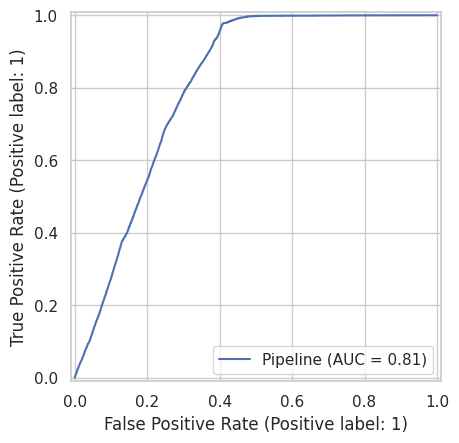

In [ ]:
# same for test set
RocCurveDisplay.from_estimator(pipeline, x_test, y_test)

What we said before also applies here (test set).

Now, let's try other methods in combination with class_weight=“balanced,” since for now we have only used it in conjunction with the oversampling method: let's try SMOTE.

This latest method generates synthetic examples of the minority class, effectively increasing the number of minority class samples in the dataset. This helps to make the dataset more balanced by giving the minority class more representation.

By combining SMOTE and class_weight="balanced", you get the benefit of both techniques:
- SMOTE improves the representation of the minority class by creating synthetic samples;
- class_weight="balanced" ensures that the model gives more importance to the minority class during training.

SMOTE is useful when you have an imbalanced dataset, and particularly when:
- The minority class is very under-represented: If your minority class accounts for only a small percentage of the total dataset (e.g., less than 10% of the data), SMOTE can be helpful to balance the dataset;

- You are not using tree-based models: While decision trees and tree-based models (e.g., random forests, XGBoost) are often robust to class imbalance, SMOTE can be particularly effective when using linear models or other models that struggle with class imbalance.

Caution with SMOTE because:
- Overfitting Risk: If the minority class has very few samples, SMOTE can sometimes lead to overfitting, as it may create synthetic samples that are too similar to each other. This is particularly a concern if you generate too many synthetic samples, leading to a loss of diversity in the data;
- Noise Propagation: If the minority class contains noisy data (incorrect or misleading examples), SMOTE can propagate this noise when generating synthetic samples, making the model less robust.

In [ ]:
# Importing package
from imblearn.over_sampling import SMOTE

# Create an SMOTE sampler to balance the dataset
smote = SMOTE(random_state=RANDOM_SEED)

# Create the logistic regression model with 'class_weight' set to 'balanced'
# 'class_weight="balanced"' adjusts the model to give more importance to the minority class
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED)

# Create the pipeline that includes the SMOTE step and the logistic regression model
# The pipeline first applies SMOTE, then trains the logistic regression model
pipeline = Pipeline([
    ('smote', smote),        # Step 1: Apply SMOTE to balance the dataset
    ('logistic', model)      # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=0)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train)
classif_report(y_train, y_pred_train)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


In [ ]:
# same for the test set
classif_report(y_test, y_pred_test)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


It is possible to see that the metrics did not improve significantly, when compared with those obtained by combining the class_weight=“balanced” and the RandomOverSampler, with the same threshold chosen.

Now, let's try class_weight="balanced" + UnderSampling:

This last one is a technique used to handle class imbalance in machine learning. It works by reducing the number of samples from the majority class (the class with more data points), so that both classes (minority and majority) have a similar number of samples. This prevents the model from being biased towards the majority class.

When you use class_weight="balanced", the model adjusts its weights so that the minority class is given more importance during training. This helps the model learn from the minority class even if the majority class is larger.

When used together:

- UnderSampling reduces the majority class size, creating a more balanced dataset;

- class_weight="balanced" ensures that the minority class still has significant influence during training.

Pros of UnderSampling:

- Helps prevent bias toward the majority class;

- Can speed up model training by reducing the dataset size.

Cons of UnderSampling:

- You might lose useful data from the majority class;

- It can lead to underfitting if too much data from the majority class is removed.

When to use it:

- Useful when you have a large, imbalanced dataset and want to speed up training;

- It's a good choice if the majority class doesn't contain important information for the model.

In [ ]:
# Importing package
from imblearn.under_sampling import RandomUnderSampler

# Create an undersampling sampler to balance the dataset
undersampler = RandomUnderSampler(random_state=RANDOM_SEED)

# Create the logistic regression model with 'class_weight' set to 'balanced'
# 'class_weight="balanced"' adjusts the model to give more importance to the minority class
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED)

# Create the pipeline that includes the undersampling step and the logistic regression model
# The pipeline first applies undersampling, then trains the logistic regression model
pipeline = Pipeline([
    ('undersampler', undersampler),  # Step 1: Apply undersampling to balance the dataset
    ('logistic', model)               # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('undersampler', RandomUnderSampler(random_state=0)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
classif_report(y_train, y_pred_train)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


In [ ]:
# same for the test set
classif_report(y_test, y_pred_test)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


Also here, it is possible to see that the metrics did not improve significantly, when compared with those obtained by combining the class_weight=“balanced” and the RandomOverSampler and combining the class_weight=“balanced” and the SMOTE, with the same threshold chosen.

Now, let's retry the combination class_weight="balanced" + oversampling (RandomOverSampler), but now we're using L1 regularization, too, which plays an important role in managing overfitting and improving the model's generalization. Here's how regularization impacts the model compared to using an unregularized model:

##**1. What is Regularization?**
Regularization is a technique to prevent the model from becoming too complex and overfitting the training data. It adds a penalty to the model’s loss function based on the size of the model's coefficients (weights). In your case, L1 regularization is used.

##**2. L1 Regularization (Penalty = 'l1'):**
- Sparsity: L1 regularization encourages sparsity, meaning that it pushes some of the model coefficients to zero. This leads to feature selection by discarding less important features (those with coefficients of zero);

- Overfitting prevention: By penalizing large weights, L1 regularization reduces the model’s capacity to fit noise or irrelevant patterns in the training data, helping to prevent overfitting and improving generalization to new, unseen data;

- Interpretability: The model becomes more interpretable since L1 regularization can remove unnecessary features, making it easier to understand which features are most important for the prediction.

##**3. Comparison to No Regularization:**
Without regularization, the logistic regression model can have very large coefficients, which might fit the training data too well, capturing noise and leading to overfitting.

Regularization (especially L1) limits the size of the coefficients and forces the model to focus on the most significant features, improving generalization and reducing the risk of overfitting.

##**4. Key Difference:**
With L1 regularization: The model will be simpler and less prone to overfitting, focusing on important features and setting others to zero.

Without regularization: The model may overfit the training data, especially in the presence of irrelevant or noisy features.

##**In summary:**
The inclusion of L1 regularization (via the penalty='l1' argument) helps reduce the model's complexity and overfitting by encouraging sparse solutions, making the model more generalizable. Without regularization, the model might overfit and perform poorly on unseen data.

In [ ]:
# Create another logistic regression model in order to manage overfitting and to improve model generalization
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED, solver='saga', C=0.1, penalty='l1')

# Create another pipeline that includes the oversampling step and the logistic regression model
pipeline = Pipeline([
    ('oversampler', oversampler),  # Step 1: Apply oversampling to balance the dataset
    ('logistic', model)  # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=0)),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=0,
                                    solver='saga'))])

In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
classif_report(y_train, y_pred_train)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


It is possible to see that the metrics did not improve significantly, when compared with the previous ones, with the same threshold chosen.

Now, we're using Elastic Net regularization in the logistic regression model. Specifically, the penalty='elasticnet' and l1_ratio=0.5 parameters define the regularization technique. Here's how Elastic Net works and how it differs from L1 and L2 regularization:

##**1. Elastic Net Regularization:**
Elastic Net is a combination of L1 and L2 regularization. It allows the model to benefit from both types of regularization:

- L1 Regularization: Encourages sparsity (setting some coefficients to zero), which is good for feature selection;

- L2 Regularization: Encourages smaller but non-zero coefficients, which helps prevent overfitting by reducing the influence of irrelevant features but not removing them completely.

The parameter l1_ratio controls the mix between L1 and L2 regularization:

- If l1_ratio = 1, the regularization is purely L1 (like in the previous case);

- If l1_ratio = 0, the regularization is purely L2.

A value of l1_ratio = 0.5 means that the regularization is an equal combination of both L1 and L2.

##**2. How Elastic Net Affects the Model:**
- Feature Selection: The L1 component (with l1_ratio) helps in feature selection by pushing some coefficients to zero;

- Shrinkage: The L2 component helps prevent the coefficients from becoming too large and overfitting the data;

- Elastic Net strikes a balance between the two, making it more flexible than pure L1 or L2 regularization alone.

##**3. Key Differences from Pure L1 Regularization:**
- L1 Regularization (as in the previous model with penalty='l1'): Encourages sparsity by setting some coefficients to zero, but may struggle when features are correlated or highly collinear;

- Elastic Net: Combines the strengths of both L1 and L2, making it more robust, especially when there are many correlated features. It can perform feature selection like L1, but also handles correlation between features better by shrinking the coefficients like L2.

##**4. Comparison to Pure L2 Regularization:**
- L2 Regularization: Primarily shrinks coefficients towards zero but doesn't set them to zero. It tends to keep all features in the model, though with smaller coefficients. It works better when all features contribute in some way to the model;

- Elastic Net: A mix of L1 and L2, offering the advantages of both (sparsity and shrinkage), and is particularly useful when features are correlated.

##**In summary:**
The model uses Elastic Net regularization, which is a mix of L1 and L2 regularization. With l1_ratio=0.5, the model applies equal weight to both L1 and L2 regularization, helping with both feature selection (L1) and coefficient shrinkage (L2), improving generalization and model performance.

In [ ]:
# Create another logistic regression model in order to manage overfitting and to improve model generalization
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_SEED, solver='saga', C=0.1, penalty='elasticnet', l1_ratio=0.5)

# Create another pipeline that includes the oversampling step and the logistic regression model
pipeline = Pipeline([
    ('oversampler', oversampler),  # Step 1: Apply oversampling to balance the dataset
    ('logistic', model)  # Step 2: Train the logistic regression model
])

# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('oversampler', RandomOverSampler(random_state=0)),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.5, penalty='elasticnet',
                                    random_state=0, solver='saga'))])

In [ ]:
# Predict the labels (classes) for the training set (x_train) using the trained model
y_pred_train = pipeline.predict(x_train)

# Predict the probabilities for each class in the training set (x_train)
y_proba_train = pipeline.predict_proba(x_train)

# Predict the labels (classes) for the test set (x_test) using the trained model
y_pred_test = pipeline.predict(x_test)

# Predict the probabilities for each class in the test set (x_test)
y_proba_test = pipeline.predict_proba(x_test)

In [ ]:
# For train test
y_pred_train = np.where(y_proba_train[:, 1] > 0.4, 1, 0)

# For test set
y_pred_test = np.where(y_proba_test[:, 1] > 0.4, 1, 0)

In [ ]:
# Call the 'classif_report' function, passing the true labels from the training set (y_train)
# and the labels predicted by the model for the training set (y_pred_train).
classif_report(y_train, y_pred_train)

PRECISION: 0.25
RECALL: 0.98
F1: 0.4
ACCURACY: 0.64


It is possible to see that the metrics did not improve significantly, when compared with the previous ones, with the same threshold chosen.

##**CONCLUSIONS:**
After looking at all these different models, we can see that the metrics have not varied significantly. The motivation behind this could be that the logistic regression model is likely limited in this case due to its linear nature, which struggles to capture non-linear relationships or complex patterns in the data.

It also may not handle feature interactions effectively without manual engineering. Moreover, logistic regression is sensitive to class imbalance, multicollinearity, and outliers, and can perform poorly with noisy or high-dimensional data.

If these issues are present, more complex models like Random Forests or XGBoost would likely perform better by capturing non-linearities, handling feature interactions, and being more robust to these challenges.